# Assignment

### Ans1)

Given a training dataset consisting of input vectors xᵢ in a feature space and corresponding binary class labels yᵢ ∈ {-1, +1}, where i = 1, 2, ..., n, the goal of a linear SVM is to find a hyperplane that maximally separates the two classes.

The equation of a hyperplane is typically represented as:

w⋅x - b = 0,

where w is the weight vector (perpendicular to the hyperplane) and b is the bias term (intercept).

For linear SVM, the decision function can be defined as:

f(x) = sign(w⋅x - b),

where sign(⋅) is the sign function, which returns -1 for negative values and +1 for positive values.

### Ans2)

The objective of the linear SVM is to find the optimal values of w and b that maximize the margin between the two classes while minimizing the classification error. This can be achieved by solving the following optimization problem:

minimize 1/2 * ||w||² + C * Σ(max(0, 1 - yᵢ(w⋅xᵢ - b))),

subject to yᵢ(w⋅xᵢ - b) ≥ 1,

where ||w|| represents the Euclidean norm of the weight vector w, C is a regularization parameter that controls the trade-off between maximizing the margin and minimizing the classification error, and Σ denotes the sum over all training samples.

### Ans3)

The kernel trick is a technique used in Support Vector Machines (SVMs) to implicitly map the input data into a higher-dimensional feature space without explicitly computing the mapping. It allows SVMs to efficiently handle non-linearly separable data by transforming the data into a higher-dimensional space where it might become linearly separable.

In traditional SVMs, a linear decision boundary is sought in the original input space. However, some datasets may not be linearly separable in the original space, making it difficult to find a linear decision boundary that separates the classes accurately. The kernel trick addresses this limitation by introducing a kernel function that calculates the inner products between the transformed feature vectors in the higher-dimensional space, without explicitly performing the transformation.

### Ans4)

In Support Vector Machines (SVM), support vectors play a crucial role in defining the decision boundary and making predictions. They are the data points that lie closest to the decision boundary or are influential in determining the position and orientation of the decision boundary.
Support vectors are the subset of training examples that have a non-zero value for the corresponding Lagrange multiplier (αᵢ) in the optimization problem of SVM. These Lagrange multipliers are obtained during the training process.

Let's consider an example to illustrate the role of support vectors in SVM:

Suppose we have a binary classification problem with two classes, labeled as positive (+) and negative (-). We have a set of data points in a two-dimensional feature space, where each data point is represented by a pair of features (x₁, x₂). The goal is to find a decision boundary that separates the two classes.

In SVM, the decision boundary is defined by a hyperplane. The hyperplane is positioned such that it maximizes the margin, which is the distance between the hyperplane and the closest data points from both classes.

During the training process, the SVM algorithm identifies the support vectors. These support vectors are the data points that lie on the margin or are misclassified. They directly influence the position and orientation of the decision boundary.

### Ans5)

Hyperplane: In SVM, the decision boundary is defined by a hyperplane that separates the two classes. A hyperplane is a flat n-1 dimensional surface in an n-dimensional space. In a two-dimensional feature space, the hyperplane is a straight line that separates the two classes.


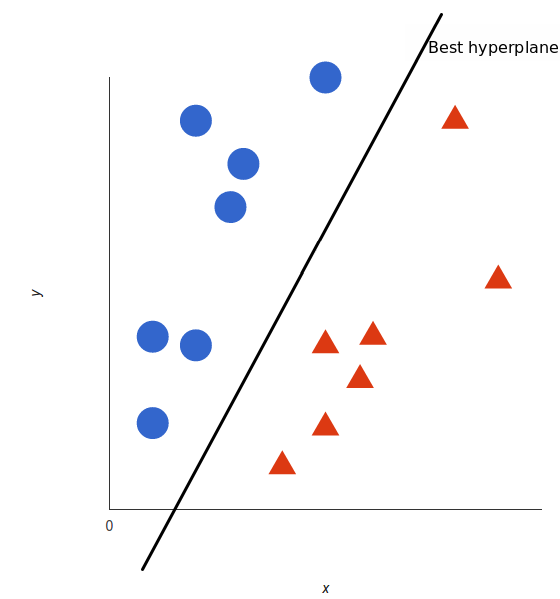

Marginal plane: In SVM, the margin is the distance between the hyperplane and the closest data points from both classes. The marginal plane is a parallel plane to the hyperplane that passes through the closest data points from both classes. The margin is maximized when the marginal plane is as far away as possible from the hyperplane.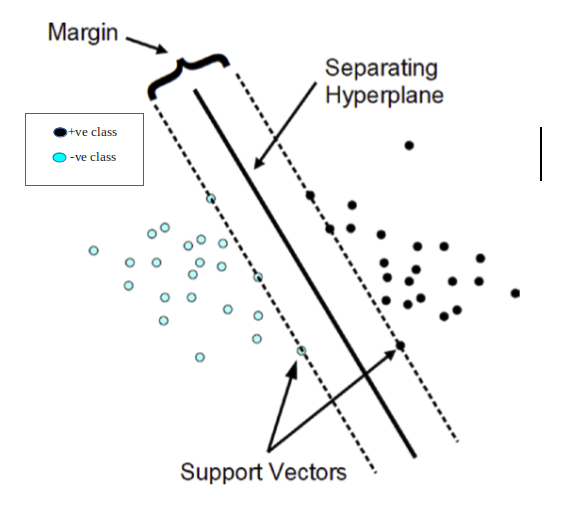

Hard margin: In SVM, the hard margin approach seeks to find a hyperplane that separates the two classes with a margin of at least a specified width (C) and no data points are allowed to be inside the margin. This approach works only when the data is linearly separable.

Soft margin: In SVM, the soft margin approach allows some data points to be inside the margin or even misclassified to find a decision boundary that has the best tradeoff between maximizing the margin and minimizing the classification error. This approach works when the data is not linearly separable.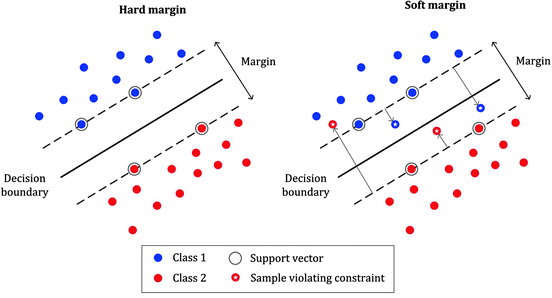

### Ans6)

In [1]:
from sklearn import datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target']= iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
y = df.pop('target')
x = df

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=43)

In [7]:
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')
clf = LinearSVC(random_state=43)
clf.fit(x_train,y_train)

LinearSVC(random_state=43)

In [8]:
from sklearn.metrics import accuracy_score
y_pred= clf.predict(x_test)
accuracy= accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy)

Accuracy: 1.0


## Remarks

- As we can see model is overfitting.
- By regularising the model, we can solve this issue. By changing the C value, an SVM can be made regular. The trade-off between increasing the margin and reducing the classification error is controlled by the C parameter. Stronger regularisation results from a lower value of C, which can aid in avoiding overfitting. To determine which C value works best for your dataset, you can experiment with a variety of values.

In [10]:
c_values = [0.1,0.5,1,10,100,1000]

for i in c_values:
    clf = LinearSVC(C=i,random_state=43)
    clf.fit(x_train,y_train)
    y_pred= clf.predict(x_test)
    accuracy= accuracy_score(y_test,y_pred)
    print(f"Accuracy at C={i}:",accuracy)

Accuracy at C=0.1: 1.0
Accuracy at C=0.5: 1.0
Accuracy at C=1: 1.0
Accuracy at C=10: 1.0
Accuracy at C=100: 1.0
Accuracy at C=1000: 0.9333333333333333


## Remarks

- At a higher value of C (1000), it appears that the model has finally overcome the overfitting problem.